# Unsupervised Learning

In [1]:
import numpy as np
import tensorflow as tf
import os 
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.decomposition import PCA
import scipy
from scipy.spatial import distance_matrix
from sklearn.manifold import TSNE
import time
from umap import UMAP

#### 1. Plot a simple example in 2D for which calculating the SVD of X is not equivalent to calculating the Principal components of X.

PCA components:
 [[ 0.78853563 -0.61498907]
 [ 0.61498907  0.78853563]]
SVD components:
 [[-0.99489571 -0.10090848]
 [ 0.10090848 -0.99489571]]
Dimention x mean: 99.99904231819546
Dimention y mean: 10.142778668086892


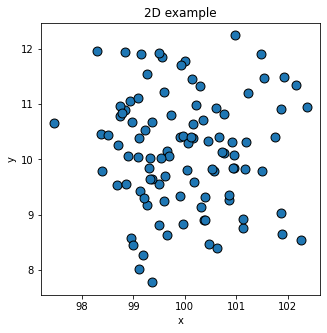

In [3]:
np.random.seed(0)
mean = [100, 10]
cov = [[1, 0], [0, 1]]
n_samples = 100

data = np.random.multivariate_normal(mean, cov, n_samples)

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1], marker='o', s=80, edgecolor='black')# Plot the dataset.
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D example')

pca = PCA(n_components = 2)
pca.fit(data)# Apply PCA
(u, sigma, v) = np.linalg.svd(data)# Apply SVD

print('PCA components:\n' , pca.components_)
print('SVD components:\n' , v)
print('Dimention x mean:', np.mean(data[:, 0]))
print('Dimention y mean:', np.mean(data[:, 1]))
plt.show()

#### As we can see, the principal components of PCA and SVD differ from one another. The difference is caused because PCA first normalizes the data matrix and then uses SVD, while SVD doesn't change the data matrix. So, if the data matrix that is already normalized we'll get the same results, but if the matrix is not normalized then the SVD at each algorithm calculates components of different matrices.

#### 2. Plot the two leading principle components of 1000 samples of the digit ’1’. 

In [4]:
(data,labels), (_,_ ) = tf.keras.datasets.mnist.load_data()

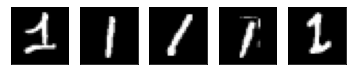

In [5]:
one_labels = labels == 1
one_samples = data[one_labels][:1000].reshape((1000, 28 * 28))

fig, axs = plt.subplots(nrows = 1, ncols = 5)
for i in range(5,10):
    axs[i-5].imshow(one_samples[i].reshape(28,28), cmap='gray')
    axs[i-5].xaxis.set_ticks([])
    axs[i-5].yaxis.set_ticks([])

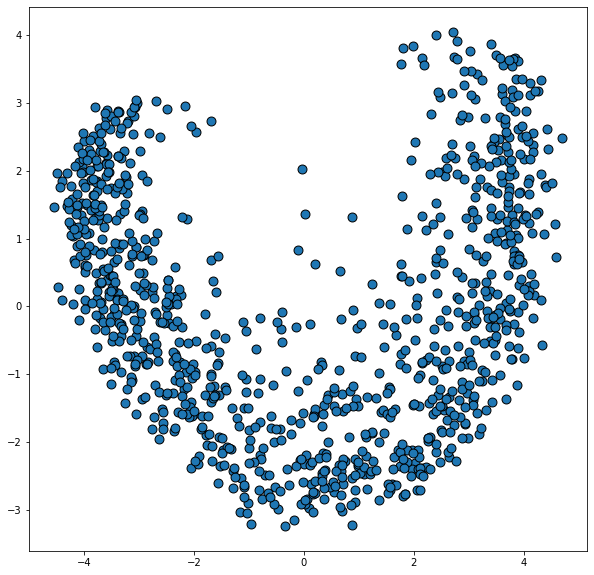

In [6]:
one_samples = one_samples / one_samples.max()
mean = one_samples.mean(axis=0, keepdims=True)
one_samples -= mean
pca_one = PCA()
pca_one.fit(one_samples)
res_one = (one_samples @ pca_one.components_.T[:,0:2]).T
fig = plt.figure(figsize=(10, 10))
plt.scatter(res_one[0],res_one[1], marker='o', s=80, edgecolor='black')
plt.show()

#### From looking at examples of digit '1' we can conclude that it has lots of options to be written (with/ without angle and with a line underneath and a line on top).That meens that we have a segnificant amount of variance in the data which let's us perform PCA and get good results since the main principal components will give the most information about the data.

#### Plot the two leading principle components of 1000 samples of the digit ’0’. 

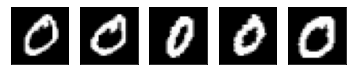

In [7]:
zero_labels = labels == 0
zero_samples = data[zero_labels][:1000].reshape((1000, 28 * 28))

fig, axs = plt.subplots(nrows = 1, ncols = 5)
for i in range(5):
    axs[i].imshow(zero_samples[i].reshape(28,28), cmap='gray')
    axs[i].xaxis.set_ticks([])
    axs[i].yaxis.set_ticks([])

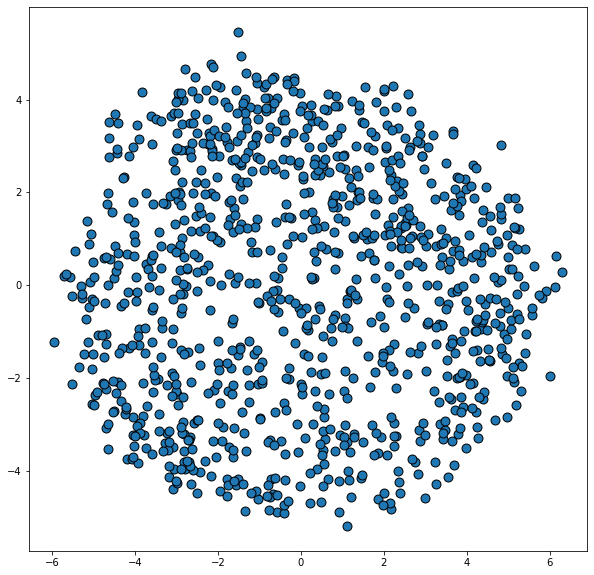

In [8]:
zero_samples = zero_samples / zero_samples.max()
mean = zero_samples.mean(axis=0, keepdims=True)
zero_samples -= mean
pca_zero = PCA()
pca_zero.fit(zero_samples)
res_zero = (zero_samples @ pca_zero.components_.T[:,0:2]).T
fig = plt.figure(figsize=(10, 10))
plt.scatter(res_zero[0],res_zero[1], marker='o', s=80, edgecolor='black')
plt.show()

#### From looking at examples of digit '0' we can conclude that it has a symmetric structure (circle), which meens that the best fit lines (or the principal components) can be at any direction since they give the same information. There is no direction which stores large amount of variance (information) from those images.

#### 4. Plot the two leading principle components of 2000 combined samples from the last two sections.

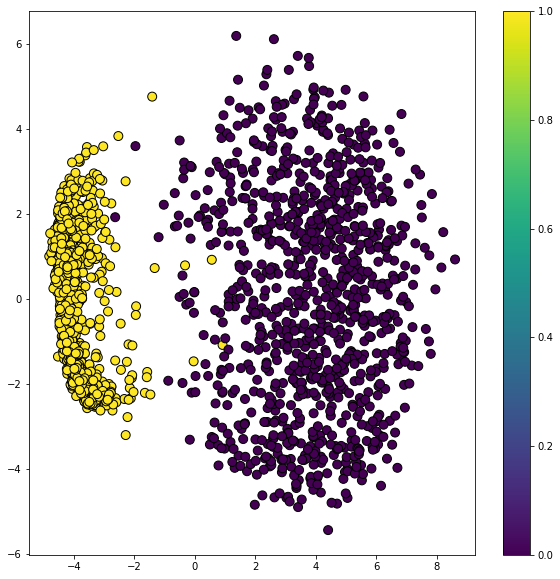

In [9]:
one_labels = labels == 1
one_samples = data[one_labels][:1000].reshape((1000, 28 * 28))
zero_labels = labels == 0
zero_samples = data[zero_labels][:1000].reshape((1000, 28 * 28))
combined_samples = np.vstack((one_samples, zero_samples))
combined_labels = np.vstack((np.ones(len(one_samples)), np.zeros(len(zero_samples))))
combined_samples = combined_samples / combined_samples.max()
mean = combined_samples.mean(axis=0, keepdims=True)
combined_samples = combined_samples - mean
pca_combined = PCA()
pca_combined.fit(combined_samples)
res_combined = (combined_samples @ pca_combined.components_.T[:,0:2]).T
fig = plt.figure(figsize=(10, 10))
plt.scatter(res_combined[0],res_combined[1], c=combined_labels, marker='o', s=80, edgecolor='black')
plt.colorbar()
plt.show()

#### Two clusters appear, each representing a different digit. The yellow cluster represents digit  '1' and the purple cluster represents digit '0'. The purple cluster is wider spread since there is no perticular axes where most variance is stored.

#### 6. How many components are required to capture 90% of the variance of the datasets from last three sections.

34 principal components are needed to represent 90% of the variance of digit '1'
57 principal components are needed to represent 90% of the variance of digit '0'
46 principal components are needed to represent 90% of the variance of both digits '1' and '0'


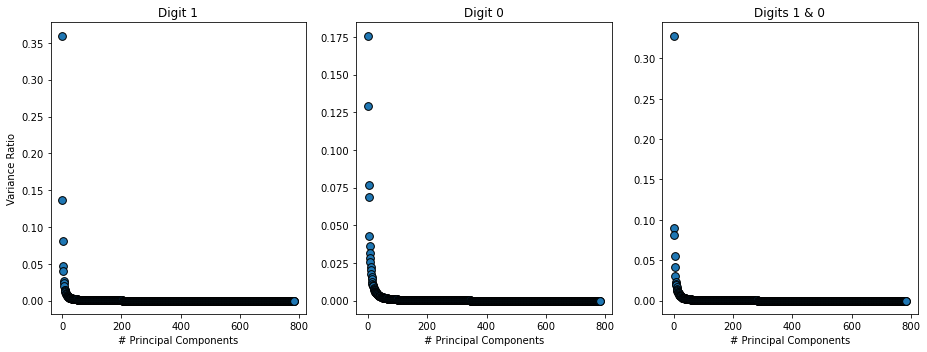

In [10]:
def find_90_per_var(variance_ratio: np.ndarray)-> float:
    return np.where(np.cumsum(variance_ratio) >= 0.9)[0][0] + 1

n_pc_one = find_90_per_var(pca_one.explained_variance_ratio_)
n_pc_zero = find_90_per_var(pca_zero.explained_variance_ratio_)
n_pc_combined = find_90_per_var(pca_combined.explained_variance_ratio_)

print(str(n_pc_one), "principal components are needed to represent 90% of the variance of digit '1'")
print(str(n_pc_zero), "principal components are needed to represent 90% of the variance of digit '0'")
print(str(n_pc_combined), "principal components are needed to represent 90% of the variance of both digits '1' and '0'")


fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(13,5))
axs[0].scatter(np.arange(784), pca_one.explained_variance_ratio_, marker='o', s=60, edgecolor='black')
axs[0].set_title('Digit 1')
axs[0].set_ylabel('Variance Ratio')
axs[0].set_xlabel('# Principal Components')
axs[1].scatter(np.arange(784), pca_zero.explained_variance_ratio_, marker='o', s=60, edgecolor='black')
axs[1].set_title('Digit 0')
axs[1].set_xlabel('# Principal Components')
axs[2].scatter(np.arange(784), pca_combined.explained_variance_ratio_, marker='o', s=60, edgecolor='black')
axs[2].set_title('Digits 1 & 0')
axs[2].set_xlabel('# Principal Components')
plt.tight_layout()
plt.show()

#### Digit 1 requires the least number of components to represent 90% of the variance compared to the others. Since digit 0 is a circle and PCA is a linear dimensionality reduction, we'll have to use more components to compensate for that. Representing digit 1 and 0 gives almost the average between the number of components of digit 1 and digit 0. 
 

#### 6. Embed the selected object into a two dimensional space using Diffusion Maps- show the results for several values of σ. What is considered a good value for σ in this example? 

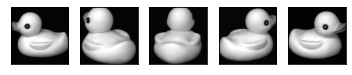

In [11]:
n_angles, x_dim, y_dim = 72, 128, 128
image_arr = np.zeros((n_angles, x_dim * y_dim))

path = os.getcwd() + '\coil-20\coil-20-proc'

for img_idx in range(n_angles):# Import COIL-20 images
    img_name = '\obj1__' + str(img_idx) + '.png'
    image_arr[img_idx,:] = img.imread(path + img_name).reshape((1,x_dim * y_dim))

fig, axs = plt.subplots(nrows = 1, ncols = 5)

for i in range(5):#Dataset exapmles
    axs[i].imshow(image_arr[10*i].reshape(x_dim , y_dim), cmap='gray')
    axs[i].xaxis.set_ticks([])
    axs[i].yaxis.set_ticks([])   

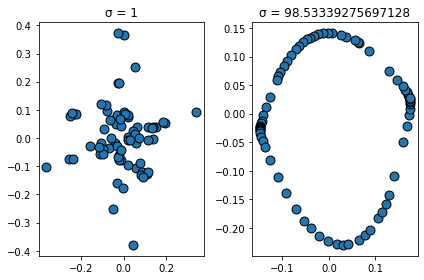

In [12]:
euclidean_dist = distance_matrix(image_arr, image_arr)
c = 0.6
sigma = [1, c*np.sort(euclidean_dist**2,axis=1)[:,1].max()]# sigma[0]- arbitrary, sigma[1]- max(min) approach
kernel = [np.exp(-euclidean_dist**2 / sigma[0]), np.exp(-euclidean_dist**2 / sigma[1])]
D1_minus = np.diag(np.sum(kernel[0],axis=0)**(-1))
P1 = D1_minus @ kernel[0]
eig_vals1,eig_vecs1 = scipy.sparse.linalg.eigs(P1,k=4)
# Arange the eigen values and eigen vectors in descending order:
eig_vecs1 = np.real(eig_vecs1[:,np.argsort(-eig_vals1)])
eig_vals1 = np.real(eig_vals1[np.argsort(-eig_vals1)])

D2_minus = np.diag(np.sum(kernel[1],axis=0)**(-1))
P2 = D2_minus @ kernel[1]
eig_vals2,eig_vecs2 = scipy.sparse.linalg.eigs(P2,k=4)
# Arange the eigen values and eigen vectors in descending order:
eig_vecs2 = np.real(eig_vecs2[:,np.argsort(-eig_vals2)])
eig_vals2 = np.real(eig_vals2[np.argsort(-eig_vals2)])

fig, axs = plt.subplots(nrows = 1, ncols = 2)
axs[0].scatter(eig_vals2[1] * eig_vecs1[:,1],eig_vals2[2] * eig_vecs1[:,2], marker='o',s=80,edgecolor='k')
axs[0].set_title('\u03C3 = ' + str(sigma[0]))
axs[1].scatter(eig_vals2[1] * eig_vecs2[:,1],eig_vals2[1] * eig_vecs2[:,2], marker='o',s=80,edgecolor='k')
axs[1].set_title('\u03C3 = ' + str(sigma[1]))
plt.tight_layout()
plt.show()

#### Diffusion map is a non-linear dimention reduction algorithm. Here, the images differ from one another by their angle and distance. The two axes (first two eigen-vectors not including the trivial one) gives us this information. Sigma has great influence on the algorithms's performance and by applying max(min) approach we can estimate a good sigma value. 
#### the graph makes sense. It is almost symmetric indicating that the images are turned 360. The shape is closed since the first and last image converges (360 deg = 0 deg). 

#### 7. Use TSN-E to embed all objects from COIL20. Run the algorithm twice and compare the results. Are they identical? How can you stabilize the results? 

In [13]:
n_angles, n_obj = 72, 20
n_img, x_dim, y_dim = n_angles * n_obj, 128, 128
image_arr = np.zeros((n_img, x_dim * y_dim))

path = os.getcwd() + '\coil-20\coil-20-proc'

for obj_idx in range(1, n_obj + 1):# Import COIL-20 images
    for img_idx in range(n_angles):
        img_name = '\obj' + str(obj_idx) + '__' + str(img_idx) + '.png'
        index = (obj_idx - 1) * n_angles + img_idx
        image_arr[index, :] = img.imread(path + img_name).reshape((x_dim * y_dim))
        
c_cluster = np.zeros(n_angles * n_obj)
for i in range(n_obj):
    c_cluster[i * n_angles: (i + 1) * n_angles] = i

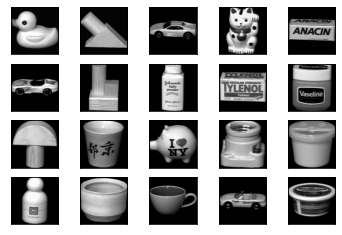

In [14]:
fig, axs = plt.subplots(nrows = 4, ncols = 5)

for row in range(4):#Coil-20 dataset examples:
    for col in range(5):
        axs[row, col].imshow(image_arr[(5*row + col)*n_angles].reshape(x_dim , y_dim), cmap='gray')
        axs[row, col].xaxis.set_ticks([])
        axs[row, col].yaxis.set_ticks([])   

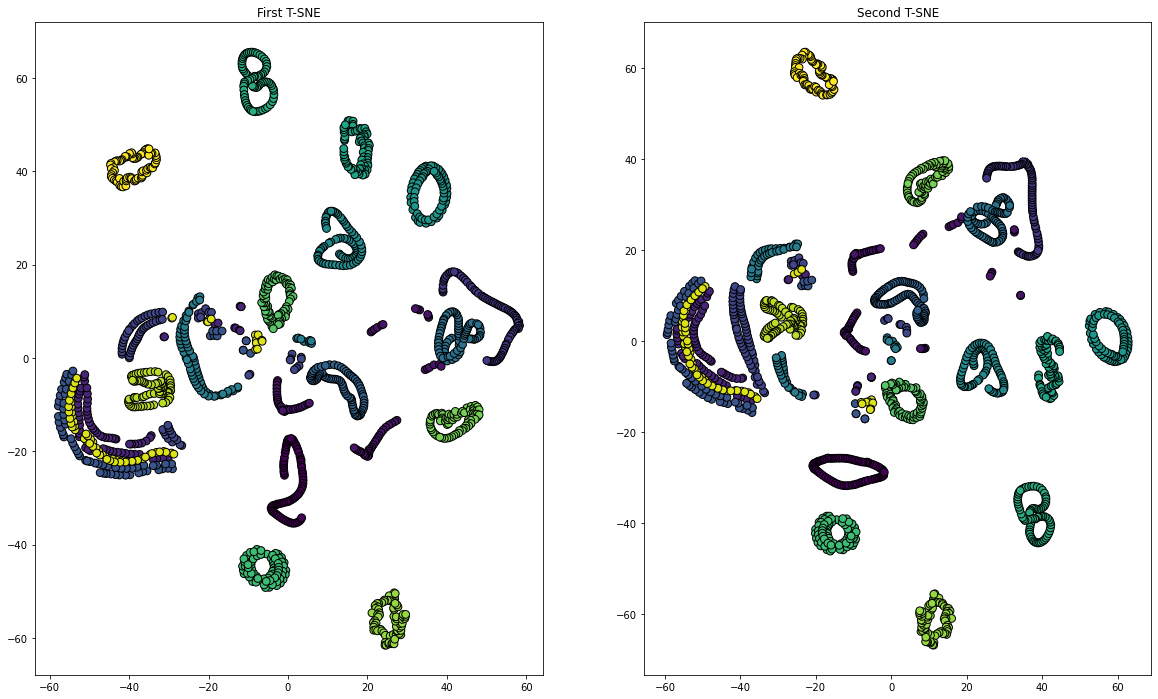

Execution Time: 3.632225275039673 Sec


In [15]:
t0 = time.time()
tsne1 = TSNE(init='random', learning_rate=200, perplexity=30).fit_transform(image_arr)
t1 = time.time()
tsne2 = TSNE(init='random', learning_rate=200, perplexity=30).fit_transform(image_arr)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,12))
axs[0].scatter(tsne1[:,0], tsne1[:,1], c=c_cluster, s=60, edgecolor='k')
axs[0].set_title('First T-SNE')
axs[1].scatter(tsne2[:,0], tsne2[:,1], c=c_cluster, s=60, edgecolor='k')
axs[1].set_title('Second T-SNE')
plt.show()
print('Execution Time: ' + str(t1-t0) + ' Sec')

#### The results are not identical. T-SNE has a random initialization, therefore each run results in different results for the same dataset. In order to stabilize the results we can set the initialization to PCA by: init=pca.

####  8. Compare the results from the previous section to UMAP. Both in terms of run time and representation quality.
 

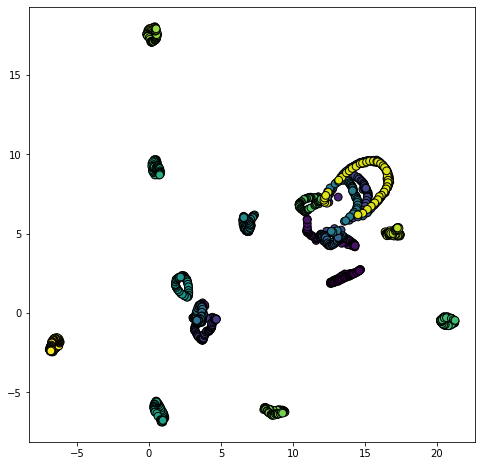

Execution Time: 8.074234962463379 Sec


In [17]:
t2 = time.time()
u = UMAP(n_neighbors=30).fit_transform(image_arr)
t3 = time.time()
fig = plt.figure(figsize=(8, 8))
plt.scatter(u[:,0],u[:,1], c=c_cluster, marker='o',s=60, edgecolor='k')
plt.show()
print('Execution Time: ' + str(t3-t2) + ' Sec')

#### Running time - the initialization at UMAP is done wisely (using the eigen-vectors of the Laplacian) rather than random at T-SNE which leads to less iterations (The execution time is bigger in this example but testing on different datasets like MNIST - UMAP won in terms of runnig time).  
#### UMAP preserves the global structure because of the usage of those eigen-vectors, so the representation quality is better  than T-SNE. 